# range type data

- 명목형 변수 : 순서나 등급이 없는 데이터 
- 순서형 변수 : 범주 사이에 명확한 순서가 있는 데이터 

## data description

|name|descript|
|:---|:---|
|id|샘플 아이디|
|title|제조사 모델명|
|odometer|주행거리|
|location|판매처(나이지리아도시)|
|isimported|현지 사용 여부|
|engine|엔진 종류|
|transmission|transmission|
|fuel|연료|
|Paint|paint color|
|year|manufacture years|
|target|car price|

In [2]:
import pandas as pd

train = pd.read_csv('../dataset/usedcar/train.csv')
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [7]:
import matplotlib.pyplot as plt

fuel_count = train['fuel'].value_counts() # 데이터 셋내의 고유한 값들의 빈도수를 계산 
display(fuel_count)

fuel
petrol    970
diesel     45
Name: count, dtype: int64

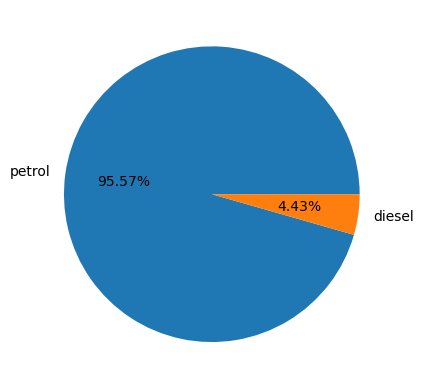

In [10]:
pie_ax = plt.pie(fuel_count, labels=fuel_count.index, autopct='%1.2f%%')
# autopct='%1.2f%%'는 각 조각의 비율을 소수점 둘째 자리까지 표시
plt.show()

# 원그래프

전체에 대한 각 부분의 비율을 직관적으로 보여줄 때 사용

- 장점: 데이터의 비율을 직관적으로 이해하기 쉬움, 간단하고 명료한 표현 가능.
- 단점: 너무 많은 범주를 포함할 경우 정보 전달이 비효율적. 


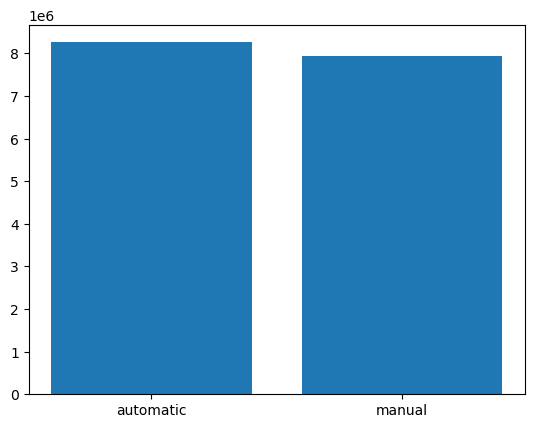

In [12]:
grouped = train.groupby('transmission')['target'].mean()
bar_ax = plt.bar(grouped.index, grouped.values)

# groupby()

- value_couts() 메서드와 같이 단순한 빈도수가 아닌, 그룹 별로 더 복잡한 데이터 집계를 수행 

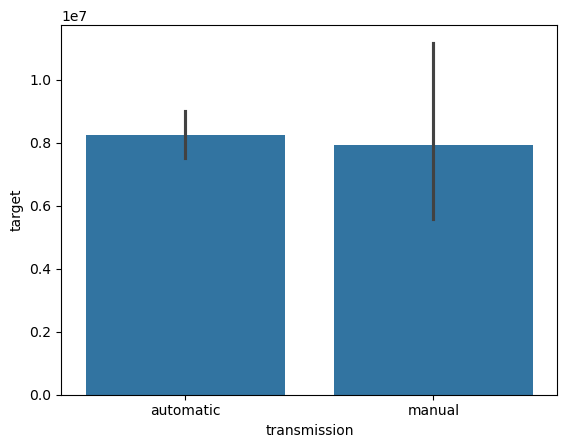

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.barplot(x='transmission', y='target', data=train)
plt.show()

# 막대 그래프로 본 변속기 유형별 차량 수 

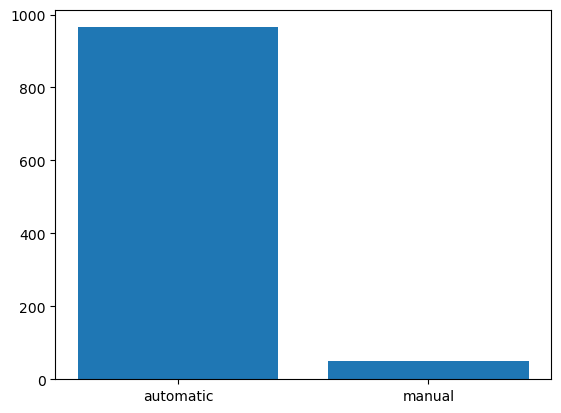

In [15]:
transmission_counts = train['transmission'].value_counts()
count_ax = plt.bar(x=transmission_counts.index, height=transmission_counts.values)
plt.show()

/opt/homebrew/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from f

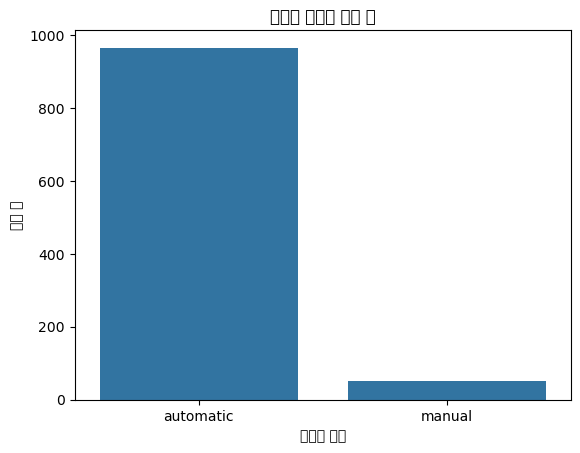

In [16]:
ax = sns.countplot(x='transmission', data=train)
plt.title('변속기 유형별 차량 수')
plt.xlabel('변속기 유형')
plt.ylabel('차량 수')
plt.show()

## 상자 수염 그림으로 본 현지 사용 여부에 따른 중고차 가격 및 이상치

### 상자 수염 그림

- 데이터의 대략적인 분포와 개별 이상치들을 동시에 보여줌
- 최소값, 최대값, 중앙값 그리고 사분위수를 나타냄 

[0       13665000
 2        9915000
 3        3815000
 4        7385000
 6        4615000
           ...   
 1008     4915000
 1010     5415000
 1011     3615000
 1012     3415000
 1013    14315000
 Name: target, Length: 744, dtype: int64,
 1       33015000
 164      8215000
 216     56515000
 295     37015000
 316      8665000
 353     33015000
 364     33040000
 391     10515000
 423     65015000
 432     68265000
 506     42015000
 555     22065000
 562     21015000
 659     18515000
 672     75015000
 736    108690000
 762     52015000
 764     40015000
 804     51040000
 821     35015000
 909      5185000
 986     18215000
 989     47015000
 Name: target, dtype: int64,
 5        1465000
 11       2085000
 13       3515000
 16        455000
 18       1203000
           ...   
 1000     1885000
 1003     2765000
 1006     1170000
 1009    26015000
 1014    10015000
 Name: target, Length: 248, dtype: int64]

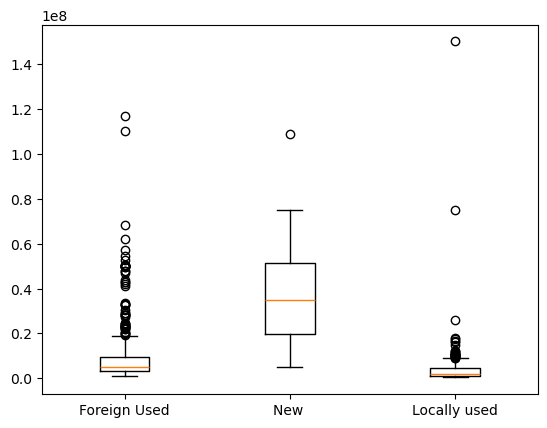

In [ ]:
data_to_plot = [train[train['isimported'] == category]['target'] for category in train['isimported'].unique()]
display(data_to_plot)
box_ax = plt.boxplot(data_to_plot)
plt.xticks(ticks=range(1, len(train['isimported'].unique()) + 1), labels=train['isimported'].unique())
#plt.xticks()는 x축의 눈금 레이블을 설정하는 함수
#ticks는 눈금의 위치를 지정하고, labels는 해당 위치에 표시할 레이블을 지정
plt.show()